### Context:
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content:
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Target : **To Predict Fraudulent Transaction**

#### Approach:
- EDA and data Visualization
- Deciding upon dependent and independent variables
- Splitting data in to training and test set
- Trying different over and under sampling technique
- Running simple classification algorithm on data for a broader view
- Trying different classification algorithm on different set of sampled data
- Comparing prediction accuracy on testy data for different combination
- Selecting comparatively better model based on test data prediction
- Performing hyper parameter tuning on the selected model and checking performance

In [1]:
!pip install imblearn

In [2]:
# Import necessary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib

#Checking  Versions of libraries used

#print("Pandas version: Pandas {}".format(pd.__version__)) # Same way of printing as bellow

print(f"Pandas version: Pandas {pd.__version__}")
print(f"Numpy version: Pandas {np.__version__}")
print(f"Matplotlib version: Pandas {matplotlib.__version__}")
print(f"Seaborn version: Pandas {sns.__version__}")

#Magicfunctions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='deep')

Pandas version: Pandas 1.3.4
Numpy version: Pandas 1.20.3
Matplotlib version: Pandas 3.4.3
Seaborn version: Pandas 0.11.2


In [3]:
# Loading the data
df=pd.read_csv('creditcard.csv_x.csv')

#### Data Overview

In [4]:
# Displaying all the columns
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [5]:
# Displaying all the rows
pd.set_option('display.max_rows',1000)

In [6]:
# Check data head
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Check data tail
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
# Check the no. of rows and columns in the dataset

m,n=df.shape
print(f'Total rows :  {m}')
print(f'Total Columns :  {n}')

Total rows :  284807
Total Columns :  31


In [9]:
# Check the columnn names

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Levels of Classification

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Observations:
- The data set contains total 31 rows and 284807 columns

- Due to confidentiality, 28 out of 31features (V1 TO V28) are given based on PCA, this column may contain sensitive information specific to the individual customer. So, this are already scaled features, we have nothing much to do about this.

- There are 3 non PCA column, we can perform EDA on them for a better understanding of the data.

**Time -** This feature contains values in second, indicates time gap form the first transaction and other recorded transactions in the data set.

**Amount -** This feature contains transaction value for each transaction.

**Class -** This feature contains level 0 and 1 where

    1 - Fraudulent transactions and
    0 - Non fraudulent transactions

### EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Observations

- All 31 columns are numerical in nature
- Only level column (Class) is integer type and other 30 are float type
- All the columns have 284807 non null values which is equivalent to the total number of rows.

In [12]:
# Check Missing values

df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Observations:**

- This data set does not contain any missing value.
- Sometimes missing values can be found in the form of 0 or na or any symbolical expression.
- In such cases we have to explore the data column wise to get a better understanding of missing value or meaning less value.

In [14]:
# Data description

df[['Time','Amount','Class']].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16
Class,284807.0,0.001727,0.041527,0.0,0.0,0.0,0.000,1.00


### Observations:
- Amount feature has 0 value transactions in it, these transactions might be the unsuccessful transactions
- By looking at mean, 3rd quartile and maximum value we can clearly say that Amount column is positively skewed
- As maximum amount is significantly higher than the 3rd quartile value, there is high probability of having outlier values.
- So, we need to further look in to the Amount column for a better understanding of the outlier values
- Class has a very low mean value, which is an indication of imbalance class.

### Distribution of Fraud and Non-Fraud transactions

In [15]:
print(f'Count of Fraud and Non Fraud Transaction: \n{df.Class.value_counts()}')
print('\n')
print(f'Percentage of Fraud and Non Fraud Transaction: \n{df.Class.value_counts(normalize=True)}')

Count of Fraud and Non Fraud Transaction: 
0    284315
1       492
Name: Class, dtype: int64


Percentage of Fraud and Non Fraud Transaction: 
0    0.998273
1    0.001727
Name: Class, dtype: float64


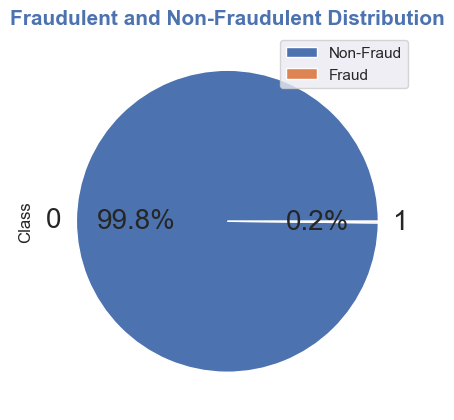

In [16]:
plt.figure(figsize=(5,5), dpi=100)
df["Class"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Fraudulent and Non-Fraudulent Distribution",color='b', fontsize = 15,fontweight='bold')
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

### Observations:
- Only 0.2% records are fraudulent transaction and other 99.8% are Non fraud transaction. So, it is clearly observed that fraudulent transaction in our record is far less than the non-fraudulent transaction.
- This is a class imbalance problem and as a result of this the prediction accuracy of the machine learning algorithm may get compromised, so we have to find a way to balance both the classes before running the algorithm

#### Checking Outlier for Transaction Amount

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


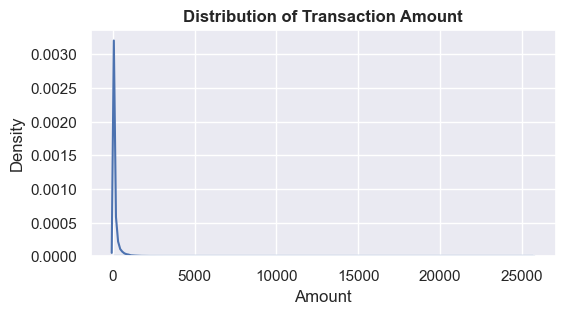

In [17]:
plt.figure(figsize=(6,3),dpi=100)
sns.distplot(df['Amount'], bins=1)
plt.title('Distribution of Transaction Amount', fontweight='bold')
plt.show()

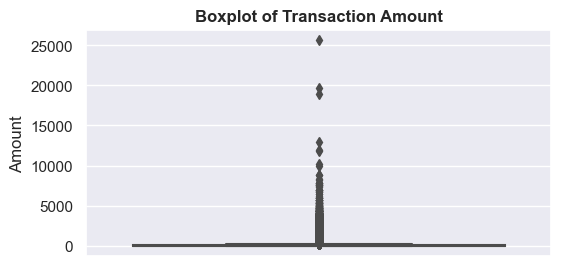

In [18]:
plt.figure(figsize=(6,3), dpi=100)
sns.boxplot(y='Amount', data=df)
plt.title('Boxplot of Transaction Amount', fontweight='bold')
plt.show()

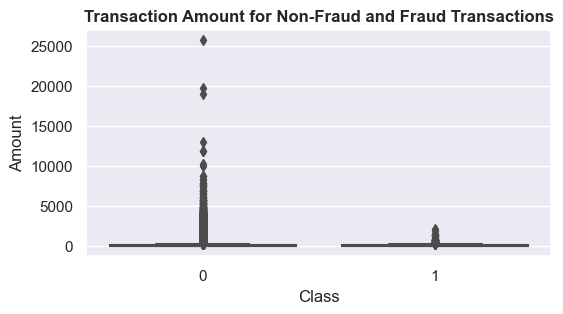

In [19]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(x='Class',y='Amount', data=df)
plt.title('Transaction Amount for Non-Fraud and Fraud Transactions', fontweight='bold')
plt.show()

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


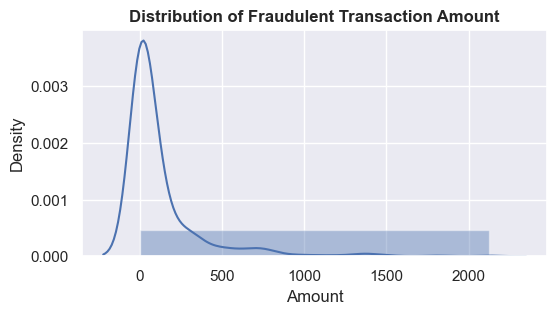

In [20]:
plt.figure(figsize=(6,3),dpi=100)
sns.distplot(df[df['Class']==1].Amount, bins=1)
plt.title("Distribution of Fraudulent Transaction Amount", fontweight='bold')
plt.show()

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


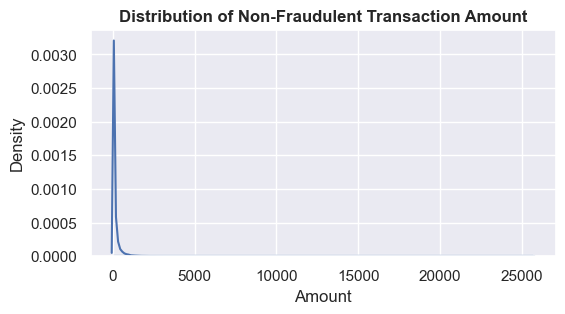

In [21]:
plt.figure(figsize=(6,3),dpi=100)
sns.distplot(df[df['Class']==0].Amount,bins=1)
plt.title("Distribution of Non-Fraudulent Transaction Amount", fontweight='bold')

plt.show()

In [22]:
df[(df['Class']==1)&(df['Amount']<=10)].Amount.value_counts().head(10)

1.00    113
0.00     27
0.76     17
0.77     10
0.01      5
2.00      4
3.79      4
1.10      3
2.28      3
0.68      3
Name: Amount, dtype: int64

In [23]:
# Counts of Fraudlent transactions

l1=len(df[(df['Class']==1)&(df['Amount']<=10)].Amount)
print(f'Total count of Fraudulent Transaction where Transaction Amount up to 10: {l1}')
l2=len(df[(df['Class']==1)].Amount)
print(f'Total count of Fraudulent Transaction: {l2}')
p=(l1/l2)*100
print(f'Percentage of Fraudulent Transaction where Transaction Amount up to 10: {p}')

Total count of Fraudulent Transaction where Transaction Amount up to 10: 249
Total count of Fraudulent Transaction: 492
Percentage of Fraudulent Transaction where Transaction Amount up to 10: 50.609756097560975


In [24]:
# Maximum transaction value for Fraudelent Transaction
print(f"Maximum transaction value for Fraudulent Transaction: {df[df['Class']==1].Amount.max()}")

Maximum transaction value for Fraudulent Transaction: 2125.87


### Fraudulent and Non Fraudulent distribution for different transacton amount

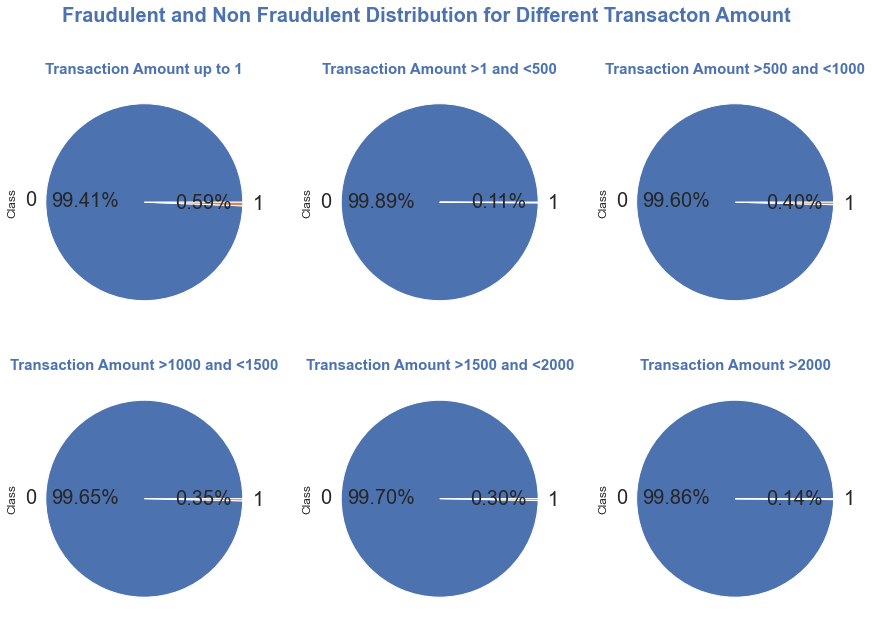

In [25]:
fig , axs = plt.subplots(nrows = 2 , ncols = 3 , figsize = (15,10))
fig.suptitle('Fraudulent and Non Fraudulent Distribution for Different Transacton Amount',fontsize = 20,color='b', fontweight='bold')


df[(df['Amount']<=1)].Class.value_counts().plot(kind = 'pie', autopct='%1.2f%%', fontsize = 20, ax=axs[0,0])
axs[0,0].set_title("Transaction Amount up to 1",color='b', fontsize = 15, fontweight='bold')

df[(df['Amount']>1)&(df['Amount']<500)].Class.value_counts().plot(kind = 'pie', autopct='%1.2f%%', fontsize = 20, ax=axs[0,1])
axs[0,1].set_title("Transaction Amount >1 and <500",color='b', fontsize = 15, fontweight='bold')

df[(df['Amount']>=500)&(df['Amount']<1000)].Class.value_counts().plot(kind = 'pie', autopct='%1.2f%%', fontsize = 20, ax=axs[0,2])
axs[0,2].set_title("Transaction Amount >500 and <1000",color='b', fontsize = 15, fontweight='bold')

df[(df['Amount']>=1000)&(df['Amount']<1500)].Class.value_counts().plot(kind = 'pie', autopct='%1.2f%%', fontsize = 20, ax=axs[1,0])
axs[1,0].set_title("Transaction Amount >1000 and <1500",color='b', fontsize = 15, fontweight='bold')

df[(df['Amount']>=1500)&(df['Amount']<2000)].Class.value_counts().plot(kind = 'pie', autopct='%1.2f%%', fontsize = 20, ax=axs[1,1])
axs[1,1].set_title("Transaction Amount >1500 and <2000",color='b', fontsize = 15, fontweight='bold')

df[(df['Amount']>=2000)].Class.value_counts().plot(kind = 'pie', autopct='%1.2f%%', fontsize = 20, ax=axs[1,2])
axs[1,2].set_title("Transaction Amount >2000",color='b', fontsize = 15, fontweight='bold')

plt.show()

### Observations:
- 50.60% share of Fraudulent transaction recorded for transaction value up to 1 where 113 transactions recorded for $1 transaction.
- Percentage share of Fraudulent transaction decreases when transaction amount gradually increases
- Maximum transaction value recorded for fraudulent transaction is 2125.87 and any amount greater than this are Non-Fraudulent transaction

**Note:-** 
- To deal with imbalance class problem, we have to remove outlier in such a way that we lose minimum or no amount of under sampled data (Fraudulent class). Otherwise we will further imbalance the data.

- Keeping this in mind we will try different technique to remove outlier from Amount Feature

#### Removal of Outliers - Inter Quartile Range

In [26]:
# Quartile values
q1,q3=np.percentile(df['Amount'],[25,75])

# Inter quartile range
iqr=q3-q1

#upper and lower bound
lower=q1-(iqr*1.5)
upper=q3+(iqr*1.5)

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Lower_Bound: {upper}")
print(f"Upper_Bound: {lower}")

# percentage of data removed
l=len(df)-len(df[df['Amount']<upper])
r=(len(df)-(len(df[df['Amount']<upper])))/len(df)*100
print(f"Percentage of data removed: {r}")
print(f"Number of rows deleted: {l}")

Q1: 5.6
Q3: 77.16499999999999
IQR: 71.565
Lower_Bound: 184.5125
Upper_Bound: -101.7475
Percentage of data removed: 11.201971861646658
Number of rows deleted: 31904


In [27]:
# Fraudulent and non Fraudulent distribution in the data

df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [28]:
# Fraud and non Fraud distribution after outlier removal
df[df['Amount']<upper].Class.value_counts(normalize=True)

0    0.998414
1    0.001586
Name: Class, dtype: float64

In [29]:
# Fraudulent and non Fraudulent distribution in the removed data
df[df['Amount']>=upper].Class.value_counts(normalize=True)

0    0.997148
1    0.002852
Name: Class, dtype: float64

In [30]:
x1=len(df[(df['Amount']>=upper)&(df['Class']==1)])
print(f'Number of Fraudulent Transaction Removed : {x1}')
x2=len(df[(df['Class']==1)].Amount)
print(f'Total count of Fraudulent Transaction: {x2}')
p1=(x1/x2)*100
print(f'Percentage Fraudulent Transaction Removed: {p1}')

Number of Fraudulent Transaction Removed : 91
Total count of Fraudulent Transaction: 492
Percentage Fraudulent Transaction Removed: 18.495934959349594


### Observations:
- Using Inter Quartile Range method for outlier removal, we are losing as much as 18.50% of our under sampled data (Fraudulent Transaction)
- This will further increase class imbalance
- Now we will use maximum Transaction Amount as our threshold to remove outlier values, thus the under sampled class remains unaffected

**Maximum Value Threshold - Outlier Removal**

In [31]:
# Maximum Amount Value of Class == 1 or Fraud Claumn
df[df['Class']==1 ]['Amount'].max()

2125.87

In [32]:
# Function - Maximum Transaction Amount as Threshold for outliar removal

def outlier_removal(max_val):
    print('***  Removing Outlier using Maximum Transaction Amount as Threshold  ***')
    print("Number of Outliar Value Removed: {}".format(len(df[(df['Class']==0) & (df['Amount']>max_val)])))
    print("Proportion of data lost: {}".format((len(df)-len(df[(df['Class']==0) & (df['Amount']<max_val)]))/len(df)*100))
          
          
#Remove outliers

    print('\n')
    print('Distribution of Fraudulent and Non-Fraudulent Class:')
    temp_df=df[df['Amount']<max_val]
    print(temp_df.Class.value_counts(normalize=True))

In [33]:
# Applying Function to remove outliers

outlier_removal(df[(df['Class']==1) & (df['Amount'])].Amount.max())

***  Removing Outlier using Maximum Transaction Amount as Threshold  ***
Number of Outliar Value Removed: 603
Proportion of data lost: 0.3844708873026295


Distribution of Fraudulent and Non-Fraudulent Class:
0    0.998272
1    0.001728
Name: Class, dtype: float64


In [34]:
# Removing Outlier
d=df[df['Amount']<2125.87]

#Reseting index after removing outliers
d.reset_index(drop = True , inplace = True)

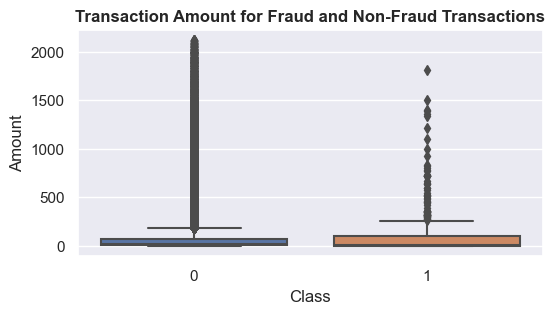

In [35]:
# Fraudulent and Non-fraudulent transactions

plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(x='Class',y='Amount', data=d)
plt.title('Transaction Amount for Fraud and Non-Fraud Transactions', fontweight='bold')
plt.show()

### Observations:
- Now we have removed outlier using maximum transaction value of fraudulent class as Threshold
- No record is lost from under sampled class (Fraudulent Class), to satisfy class imbalance problem

**Exploring Time Feature**

In [36]:
# Maximum duration of data recording
d.Time.max()/(60*60)

47.99777777777778

### Observations:
- Time column represents the time gap between the first and any other transaction in second
- So, minimum value represents the initial transaction and maximum value represent the last transaction recorded in the dataset
- By converting the maximum value in hour term, we get the duration for which the data has been collected
- Here we can see last transaction happened 48 hr(approx.) after the first transaction, so we have two days data in hand

Now we will try to find out the distribution of transaction happened in this two days

#### Distribution of transactions happened in two days

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


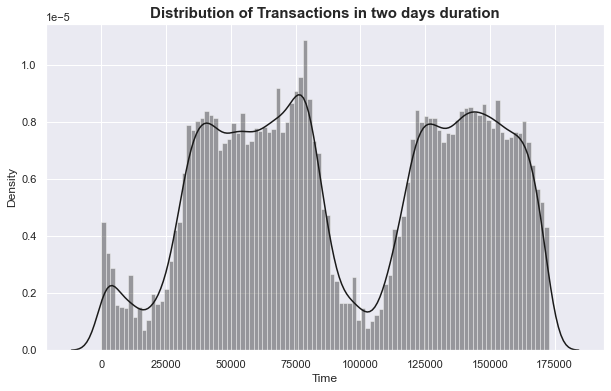

In [37]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Transactions in two days duration", fontsize=15,fontweight='bold')
sns.distplot(d.Time, bins=100, color='k')
plt.show()

### Observations:
- From the distribution we can observe that there is a symmetrical pattern in number of transactions
- Probably in the day time number of transactions is high for both of the day and low in the night time
- Now we will convert the time frame in hours term and see the distribution of transactions in different time of the day

In [38]:
# Converting Time into hours
d['Time_Hours']=d['Time']/(60*60)

C:\Users\sangam\AppData\Local\Temp/ipykernel_9944/2886134210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Time_Hours']=d['Time']/(60*60)


In [39]:
# glimpse of all the columns in the dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [40]:
# Check data head of the same columns
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


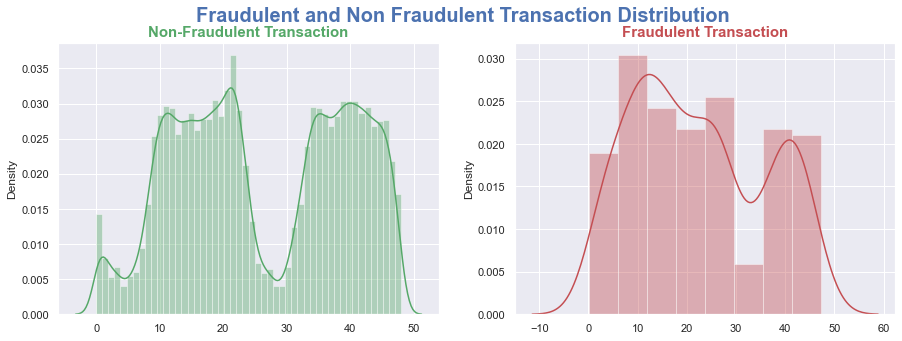

In [41]:
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
fig.suptitle('Fraudulent and Non Fraudulent Transaction Distribution',fontsize = 20,color='b', fontweight='bold')


sns.distplot(d[d['Class']==0]['Time_Hours'].values , color = 'g' , ax = axs[0])
axs[0].set_title("Non-Fraudulent Transaction",color='g', fontsize = 15, fontweight='bold')

sns.distplot(d[d['Class']==1]['Time_Hours'].values , color = 'r' , ax = axs[1])
axs[1].set_title("Fraudulent Transaction",color='r', fontsize = 15, fontweight='bold')

plt.show()

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


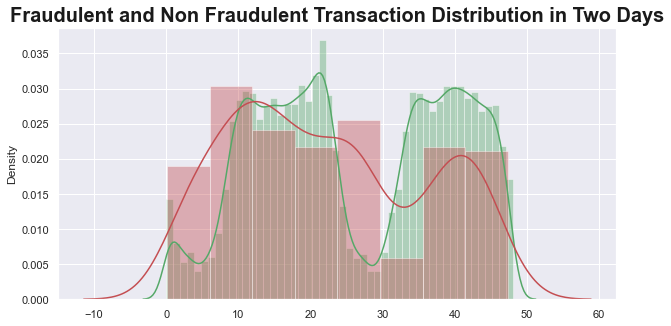

In [42]:
plt.figure(figsize=(10,5))
plt.title('Fraudulent and Non Fraudulent Transaction Distribution in Two Days',fontsize = 20, color='k', fontweight='bold')
sns.distplot(d[d.Class==0].Time_Hours.values,color='g')
sns.distplot(d[d.Class==1].Time_Hours.values, color='r')
plt.show()

### Observations:
- From the distribution we can observe that for both of the days when number of non-fraudulent transaction is high, number of fraudulent transactions is also high
- But when number of non-fraudulent transaction is low, frequency of fraudulent transaction is comparatively higher
- Probably frequency of fraudulent transaction is higher at the night time when normal business activity is less
- Now we will try to figure out the pattern for both fraudulent and non-fraudulent transactions during different time of the day

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


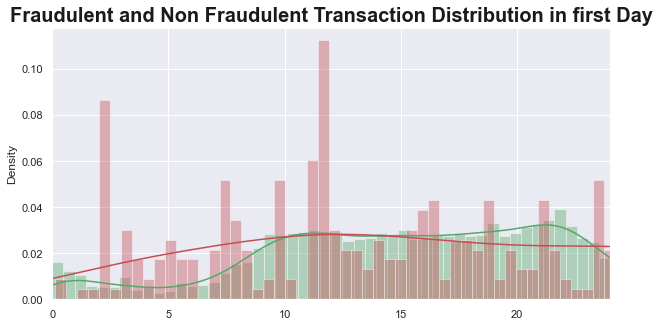

In [43]:
# Ploting data in 0-24 hrs time frame

plt.figure(figsize=(10,5))
plt.title('Fraudulent and Non Fraudulent Transaction Distribution in first Day',fontsize = 20, color='k', fontweight='bold')
sns.distplot(d[d.Class==0].Time_Hours.values,color='g', bins=100)
sns.distplot(d[d.Class==1].Time_Hours.values, color='r',bins=100)
plt.xlim([0,24])
plt.show()

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


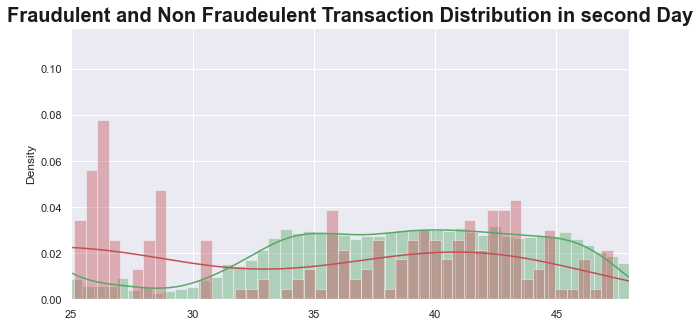

In [44]:
# Ploting data in 25-48 hrs time frame
plt.figure(figsize=(10,5))
plt.title('Fraudulent and Non Fraudeulent Transaction Distribution in second Day',fontsize = 20, color='k', fontweight='bold')
sns.distplot(d[d.Class==0].Time_Hours.values,color='g', bins=100)
sns.distplot(d[d.Class==1].Time_Hours.values, color='r',bins=100)
plt.xlim([25,48])
plt.show()

## Observations:
- Assuming recording of data started form 12am at night
- In 24 hours’, time frame, at the night time (from 12am to 9am - when normal business activity is less) frequency of Fraudulent transaction is higher
- Again, after the evening time (after 9-10pm) frequency of non-fraudulent transaction starts reducing but at same time frequency of fraudulent transaction is higher

### Scaling of Features

#### Note:
- V1 to V28 PCA, so already in scaled form
- Distribution of Amount feature is highly positively skewed, so we will scale this feature using different method and compare the prediction of the machine learning algorithm for better accuracy for different scaling

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


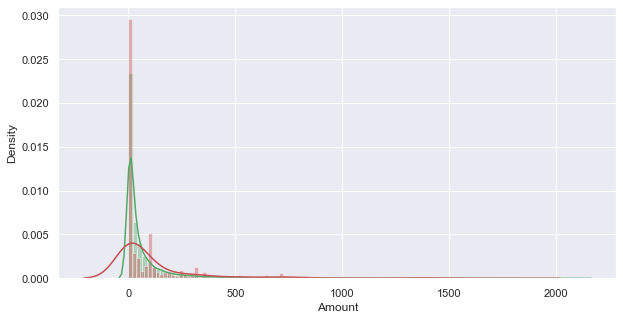

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(d[d.Class==0].Amount,bins=100,color='g')
sns.distplot(d[d.Class==1].Amount,bins=100,color='r')
plt.show()

#### Standar Scaler of Amount

In [46]:
 # Importing library
    
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [47]:
d['Std_Amount']=ss.fit_transform(d['Amount'].values.reshape(-1,1))

C:\Users\sangam\AppData\Local\Temp/ipykernel_9944/1175510908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Std_Amount']=ss.fit_transform(d['Amount'].values.reshape(-1,1))


In [48]:
# Checking the columns again
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


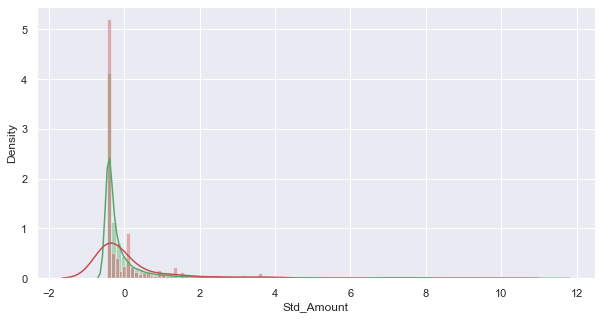

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(d[d.Class==0].Std_Amount,bins=100,color='g')
sns.distplot(d[d.Class==1].Std_Amount,bins=100,color='r')
plt.show()

#### Min-Max Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

n = MinMaxScaler()
d['Mm_Amount'] = n.fit_transform(d['Amount'].values.reshape(-1,1))

C:\Users\sangam\AppData\Local\Temp/ipykernel_9944/3984326453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Mm_Amount'] = n.fit_transform(d['Amount'].values.reshape(-1,1))


In [51]:
# Checking columns again
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


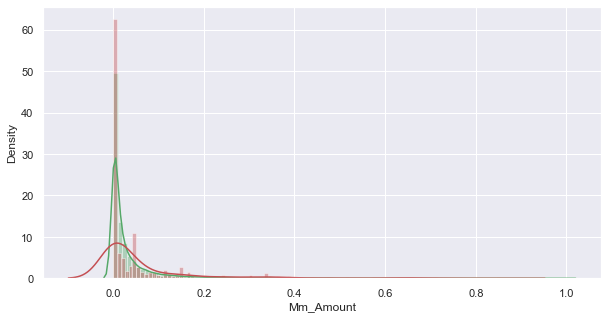

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(d[d.Class==0].Mm_Amount,bins=100,color='g')
sns.distplot(d[d.Class==1].Mm_Amount,bins=100,color='r')
plt.show()

#### Log Transformation of Amount

In [53]:
#Log Transformation
d['Log_Amount'] = np.log(d.Amount + 0.01)

C:\Users\sangam\AppData\Local\Temp/ipykernel_9944/1259056678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Log_Amount'] = np.log(d.Amount + 0.01)


In [54]:
# Checking columns 
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


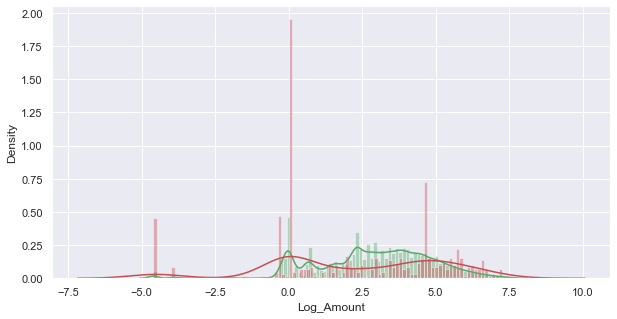

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(d[d.Class==0].Log_Amount,bins=100,color='g')
sns.distplot(d[d.Class==1].Log_Amount,bins=100,color='r')
plt.show()

#### Comparing and figuring out better Scaling methods

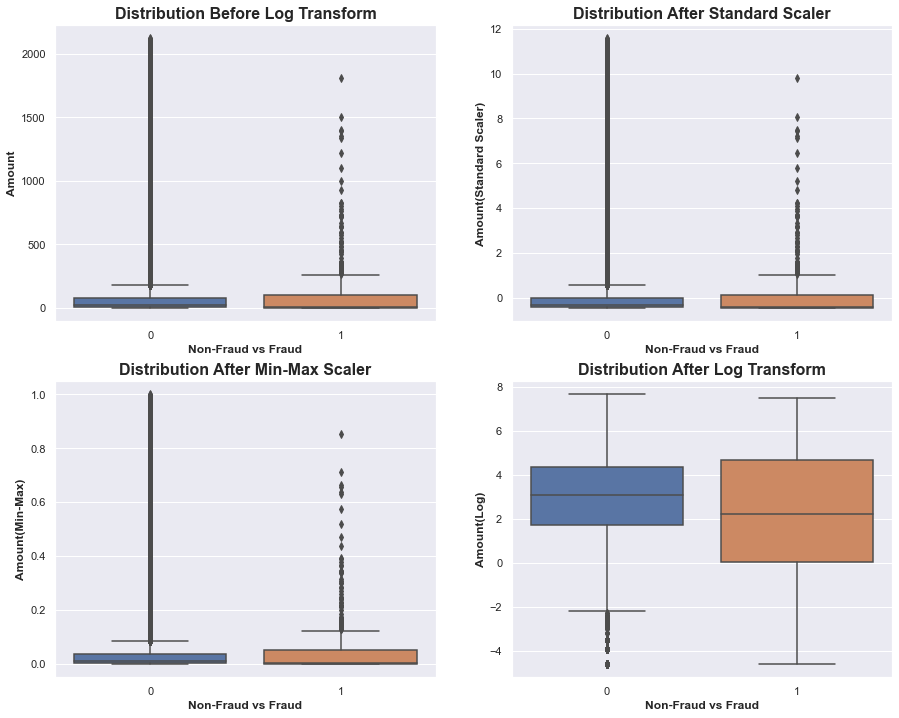

In [56]:
plt.figure(figsize=(15,12))

# Let's explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(221)
ax = sns.boxplot(x ="Class",y="Amount",data=d)
ax.set_title("Distribution Before Log Transform", fontsize=16, fontweight='bold')
ax.set_xlabel("Non-Fraud vs Fraud", fontsize=12, fontweight='bold')
ax.set_ylabel("Amount", fontsize = 12, fontweight='bold')

plt.subplot(222)
ax1 = sns.boxplot(x ="Class",y="Std_Amount", data=d)
ax1.set_title("Distribution After Standard Scaler", fontsize=16, fontweight='bold')
ax1.set_xlabel("Non-Fraud vs Fraud", fontsize=12, fontweight='bold')
ax1.set_ylabel("Amount(Standard Scaler)", fontsize = 12, fontweight='bold')

plt.subplot(223)
ax2 = sns.boxplot(x ="Class",y="Mm_Amount", data=d)
ax2.set_title("Distribution After Min-Max Scaler", fontsize=16, fontweight='bold')
ax2.set_xlabel("Non-Fraud vs Fraud", fontsize=12, fontweight='bold')
ax2.set_ylabel("Amount(Min-Max)", fontsize = 12, fontweight='bold')

plt.subplot(224)
ax3 = sns.boxplot(x ="Class",y="Log_Amount", data=d)
ax3.set_title("Distribution After Log Transform", fontsize=16, fontweight='bold')
ax3.set_xlabel("Non-Fraud vs Fraud", fontsize=12, fontweight='bold')
ax3.set_ylabel("Amount(Log)", fontsize = 12, fontweight='bold')

plt.show()

**Findings:**
We can clearly observe that log transformation of Amount column gives better form of scaling

#### Finding Correlation

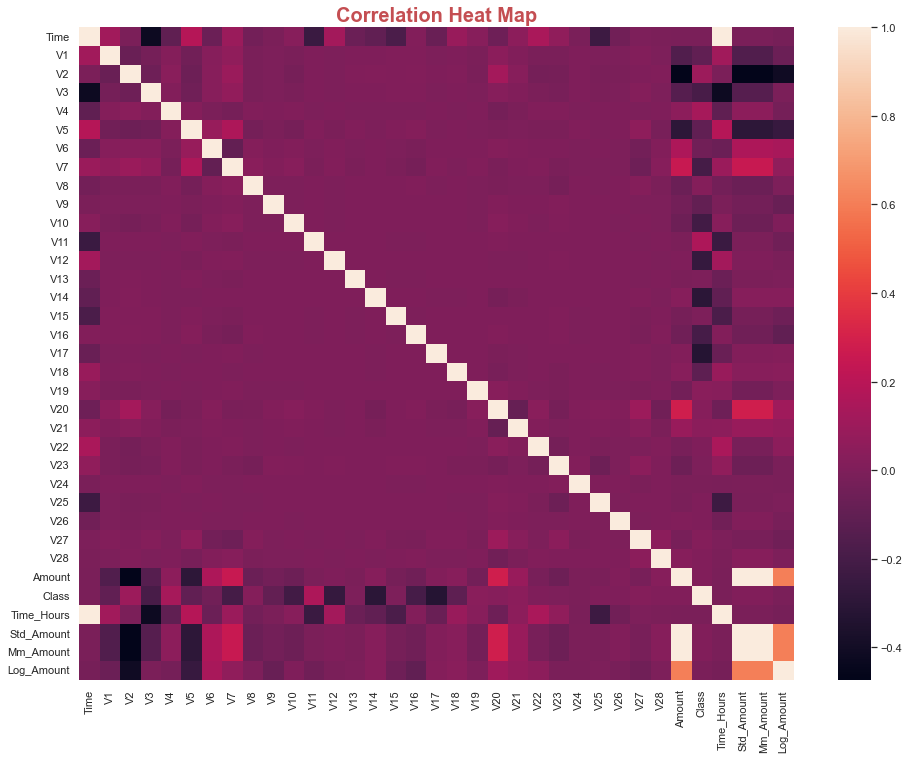

In [57]:

# Plotting a Correlation plot between cloumns
plt.figure(figsize = (16,12))
plt.title("Correlation Heat Map", fontsize=20, color='r', fontweight='bold')
corr_matrix = d.corr()
sns.heatmap(corr_matrix,annot=False)
plt.show()

### Visualizations of Overall data

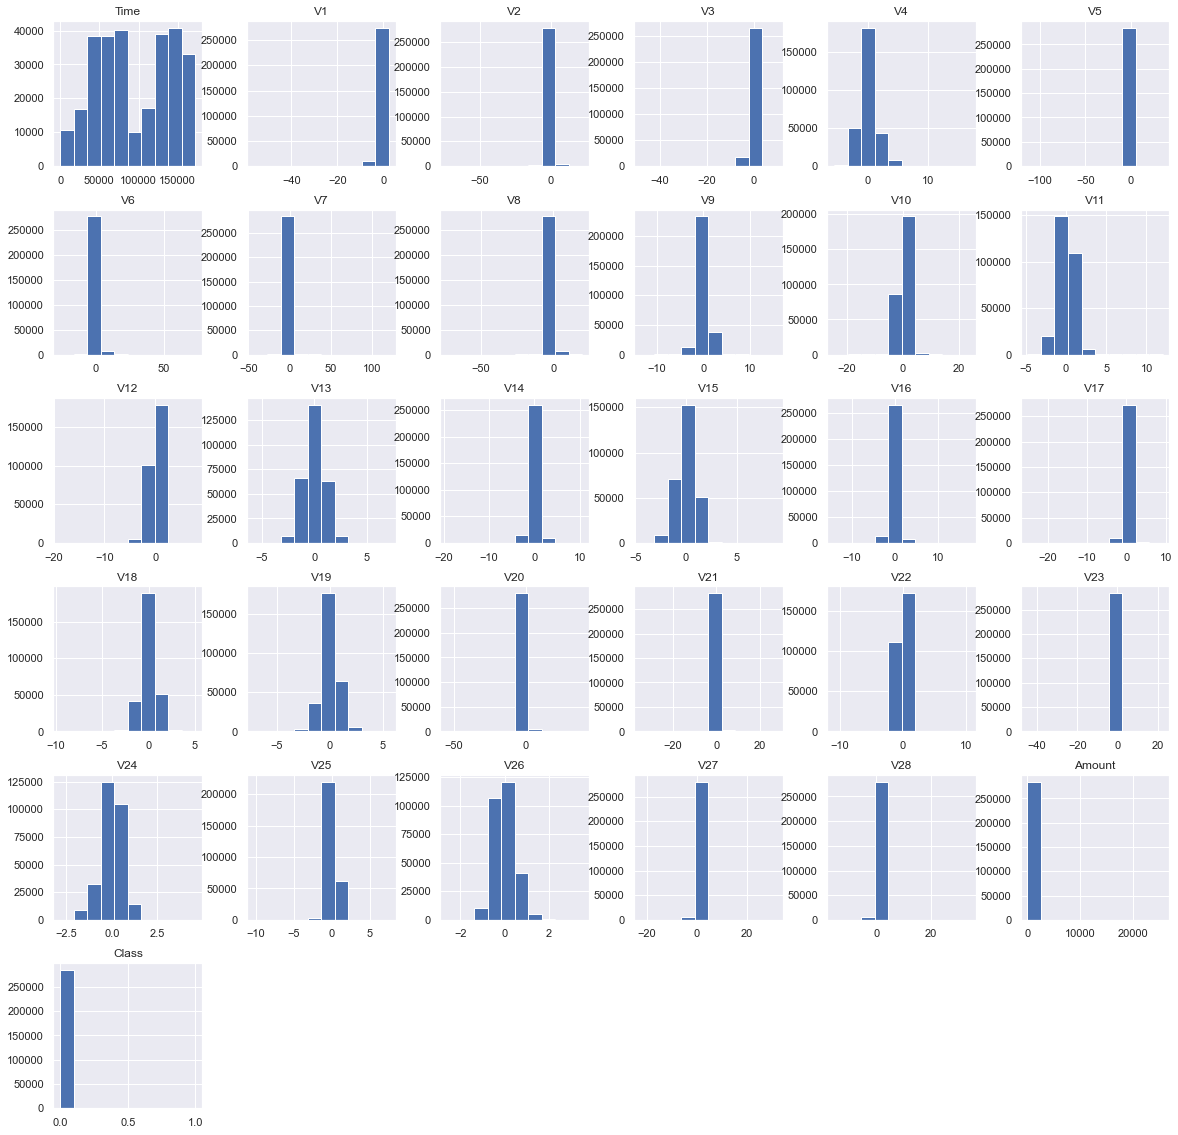

In [58]:
# Multivariate analysis

df.hist(figsize = (20,20))
plt.show()

#### Exporting pre processing data

In [59]:
df.to_csv('processed.csv')
# df.to_csv('processed.csv')

In [60]:
# Again reading the Processed data
data=pd.read_csv('processed.csv')
data=d

#### Creating Dependent Veriable

In [61]:
y=data.Class

In [62]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_Hours', 'Std_Amount', 'Mm_Amount', 'Log_Amount'],
      dtype='object')

#### Creating Independent Veriable

In [63]:
# Dropping the columns that are insignificant for current analysis
X=data.drop(columns=['Time','Class','Time_Hours','Std_Amount','Mm_Amount','Amount'])

In [64]:
# Check columns of the dataset
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Log_Amount'],
      dtype='object')

### Spliting Data into Training and Test Set

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Running Logistic Regression Model on Imbalance Class Data

In [66]:
pd.Series(y_train).value_counts()

0    198615
1       327
Name: Class, dtype: int64

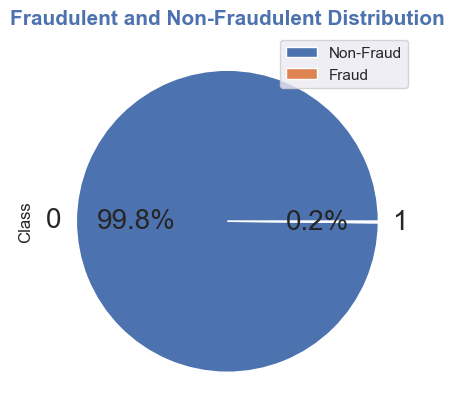

In [67]:
plt.figure(figsize=(5,5), dpi=100)
pd.Series(y_train).value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Fraudulent and Non-Fraudulent Distribution",color='b', fontsize = 15, fontweight='bold')
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

In [68]:
# Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Creating method for logistic regression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 

LogisticRegression()

#### Predicting Test data

In [69]:
y_pred=logreg.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

#### Confusion Matrix

In [70]:
# Importing library for confusion matrix
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

In [71]:
print('Distribution of Test Data:')
pd.Series(y_test).value_counts()

Distribution of Test Data:


0    85097
1      164
Name: Class, dtype: int64

In [72]:
print('Confusion Matrix:')
cnf_matrix

Confusion Matrix:


array([[85080,    17],
       [   58,   106]], dtype=int64)

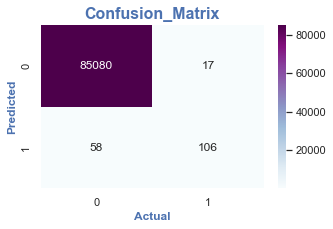

In [73]:
# Building Confusion Matrix for the same

plt.figure(figsize=(5,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuPu', fmt='d')
plt.title("Confusion_Matrix", fontsize=16, color='b',fontweight="bold")
plt.ylabel('Predicted', color='b',fontweight="bold")
plt.xlabel('Actual', color='b',fontweight="bold")
plt.show()

In [74]:
# Fraudlent Class prediction (Recall Score of class-1)
print(f'Recall Score of Class 1: {cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]):.4f}')

Recall Score of Class 1: 0.6463


**Note:**
Our focus is to check the accuracy percentage of fraudlent class prediction, more precisely Recall Score of Class

#### Accuracy Score

In [75]:
# Accuracy Score
print(f'Accuracy Score: {accuracy_score(y_pred, y_test):.4f}')

Accuracy Score: 0.9991


#### Precision Score

In [76]:
# Precision Score
print(f'Precision Score: {precision_score(y_test , y_pred):.4f}')

Precision Score: 0.8618


#### Recall Score

In [77]:
# Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred):.4f}')

Recall Score: 0.6463


#### F1 Score, Harmonic mnean of Precision (PRE) and Recall (REC)

In [78]:
# F1 Score, harmonic mean of precision (PRE) and recall (REC)
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')

F1 Score: 0.7387


#### Accuracy Summary report

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85097
           1       0.86      0.65      0.74       164

    accuracy                           1.00     85261
   macro avg       0.93      0.82      0.87     85261
weighted avg       1.00      1.00      1.00     85261



### Observations:
- Here, our goal is to predict Fraudulent traction correctly. So, our focus area is to check the accuracy percentage of fraudulent class prediction, more precisely Recall Score of Class 1.
- In this model, out of 164 fraudulent transaction 106 transaction has been predicted correctly
- So, the model has predicted our target outcome with 64.63% accuracy

#### Loging at predicted Probability

In [80]:
y_pred_proba = logreg.predict_proba(X_test)

In [81]:
y_pred_proba[:5]

array([[9.99744871e-01, 2.55129275e-04],
       [9.99943822e-01, 5.61779968e-05],
       [9.99880264e-01, 1.19736187e-04],
       [9.99621417e-01, 3.78583332e-04],
       [9.99890933e-01, 1.09067477e-04]])

#### ROC AUC Curve

In [82]:
from sklearn.metrics import roc_auc_score
print(f'ROC_AUC Score: {roc_auc_score(y_test , y_pred):.4f}')

ROC_AUC Score: 0.8231


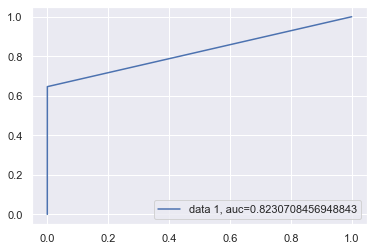

In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)

plt.show()

#### Fixing Imbalance Class Applying Sampling Techinique => Running Algorithm => Comparing Performance

In [84]:
# Importing Libraries
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # counter takes values returns value_counts dictionary

#### Under Sampling Data

In [85]:
from sklearn.datasets import make_classification

#X, y = make_classification(n_classes=2) #, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s'  %Counter(y))

rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283712, 1: 491})
Resampled dataset shape Counter({0: 491, 1: 491})


In [86]:
pd.Series(y_res).value_counts()

0    491
1    491
Name: Class, dtype: int64

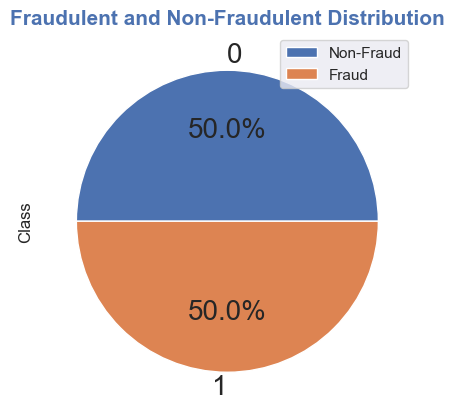

In [87]:
plt.figure(figsize=(5,5), dpi=100)
pd.Series(y_res).value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Fraudulent and Non-Fraudulent Distribution",color='b', fontsize = 15, fontweight='bold')
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

#### Splitting the data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

#### Logistic Regression

In [89]:
# Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression

# Creating method for logistic regression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)  

LogisticRegression()

In [90]:
# Predicting Test data
y_pred=logreg.predict(X_test)
y_pred[:5]

array([0, 0, 0, 1, 0], dtype=int64)

#### Confusion Matrix

In [91]:
# Importing library for confusion matrix
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

In [92]:
print('Distribution of Test Data:')
pd.Series(y_test).value_counts()

Distribution of Test Data:


0    149
1    146
Name: Class, dtype: int64

In [93]:
print('Confusion Matrix:')
cnf_matrix

Confusion Matrix:


array([[140,   9],
       [ 12, 134]], dtype=int64)

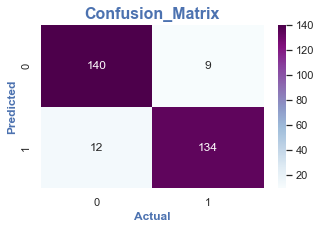

In [94]:
# Building Confusion Matrix

plt.figure(figsize=(5,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuPu', fmt='d')
plt.title("Confusion_Matrix", fontsize=16, color='b',fontweight="bold")
plt.ylabel('Predicted', color='b',fontweight="bold")
plt.xlabel('Actual', color='b',fontweight="bold")
plt.show()

In [95]:
# Fraudlent Class prediction (Recall Score of class-1)
print(f'Recall Score of Class 1: {cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]):.4f}')

Recall Score of Class 1: 0.9178


**Note:**
Our focus is to check the accuracy percentage of fraudulent class prediction, more precisely Recall Score of Class 1

#### Accuracy Score

In [96]:
# Accuracy Score
print(f'Accuracy Score: {accuracy_score(y_pred, y_test):.4f}')

Accuracy Score: 0.9288


#### Precision Score

In [97]:
# Precision Score
print(f'Precision Score: {precision_score(y_test , y_pred):.4f}')

Precision Score: 0.9371


#### Recall Score

In [98]:
# Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred):.4f}')

Recall Score: 0.9178


#### F1 Score, harmonic mean of precision (PRE) and recall (REC)

#### Accuracy Summary Report

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       149
           1       0.94      0.92      0.93       146

    accuracy                           0.93       295
   macro avg       0.93      0.93      0.93       295
weighted avg       0.93      0.93      0.93       295



### Observations:
- As our goal is to predict Fraudulent traction correctly. So, our focus area is to check the accuracy percentage of fraudulent class prediction
- Using Under Sampling technique to handle imbalance class problem, out of 146 fraudulent transaction, 134 transaction has been predicted correctly
- So, the model has predicted our target outcome with 91.78% accuracy

#### Looking at predicted probability

In [100]:
y_pred_proba = logreg.predict_proba(X_test)

In [101]:
y_pred_proba[:5]

array([[9.95246317e-01, 4.75368336e-03],
       [9.81703718e-01, 1.82962819e-02],
       [8.87604862e-01, 1.12395138e-01],
       [4.88632909e-06, 9.99995114e-01],
       [8.01015747e-01, 1.98984253e-01]])

#### ROC AUC Curve

In [102]:
from sklearn.metrics import roc_auc_score
print(f'ROC_AUC Score: {roc_auc_score(y_test , y_pred):.4f}')

ROC_AUC Score: 0.9287


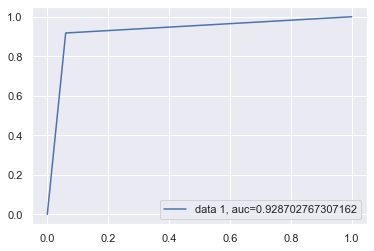

In [103]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)

plt.show()

#### OverSampling

In [104]:
# Importing Library
from imblearn.over_sampling import RandomOverSampler

In [105]:
print('Original dataset shape %s' % Counter(y))
random_state = 42

rus = RandomOverSampler(random_state=random_state)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283712, 1: 491})
Resampled dataset shape Counter({0: 283712, 1: 283712})


In [106]:
pd.Series(y_res).value_counts()

0    283712
1    283712
Name: Class, dtype: int64

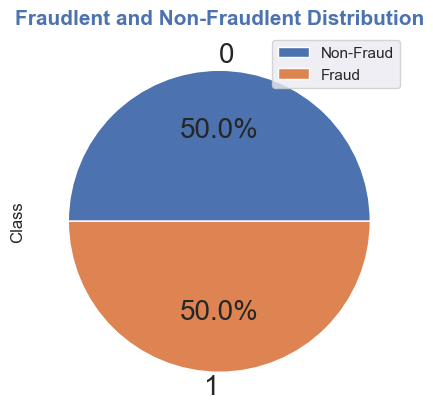

In [107]:
plt.figure(figsize=(5,5), dpi=100)
pd.Series(y_res).value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Fraudlent and Non-Fraudlent Distribution",color='b', fontsize = 15, fontweight='bold')
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

#### Splitting the data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

#### Logistic Regression

In [109]:
# Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression

# Creating method for logistic regression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)  

LogisticRegression()

#### Predicting Test data

In [110]:
y_pred=logreg.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [111]:
# Importing library for confusion matrix
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

In [112]:
print('Distribution of Test Data:')
pd.Series(y_test).value_counts()

Distribution of Test Data:


1    85393
0    84835
Name: Class, dtype: int64

In [113]:
print('Confusion Matrix:')
cnf_matrix

Confusion Matrix:


array([[82972,  1863],
       [ 6744, 78649]], dtype=int64)

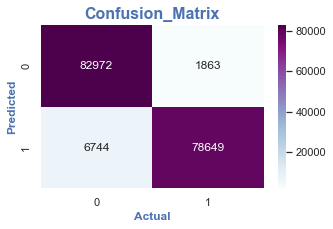

In [114]:
# Plotting confusion Matrix for the same

plt.figure(figsize=(5,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuPu', fmt='d')
plt.title("Confusion_Matrix", fontsize=16, color='b',fontweight="bold")
plt.ylabel('Predicted', color='b',fontweight="bold")
plt.xlabel('Actual', color='b',fontweight="bold")
plt.show()

In [115]:
# Fraudlent Class prediction (Recall Score of class-1)
print(f'Recall Score of Class 1: {cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]):.4f}')

Recall Score of Class 1: 0.9210


**Note:**
Our focus is to check the accuracy percentage of fraudulent class prediction, more precisely Recall Score of Class 1

#### Accuracy Score

In [116]:
# Accuracy Score
print(f'Accuracy Score: {accuracy_score(y_pred, y_test):.4f}')

Accuracy Score: 0.9494


#### Precision Score

In [117]:
# Precision Score
print(f'Precision Score: {precision_score(y_test , y_pred):.4f}')

Precision Score: 0.9769


#### Recall Score

In [118]:
# Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred):.4f}')

Recall Score: 0.9210


#### F1 Score, harmonic mean of precision (PRE) and recall (REC)

In [119]:
# F1 Score, harmonic mean of precision (PRE) and recall (REC)
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')

F1 Score: 0.9481


#### Accuracy Summary Report

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84835
           1       0.98      0.92      0.95     85393

    accuracy                           0.95    170228
   macro avg       0.95      0.95      0.95    170228
weighted avg       0.95      0.95      0.95    170228



### Observations:
- As our goal is to predict Fraudulent traction correctly. So, our focus area is to check the accuracy percentage of fraudulent class prediction
- Using Over Sampling technique to handle imbalance class problem, out of 85393 fraudulent transaction, 78649 transaction has been predicted correctly
- So, the model has predicted our target outcome with 92.10% accuracy

#### Looking at predicted probability

In [121]:
y_pred_proba = logreg.predict_proba(X_test)

In [122]:
y_pred_proba[:5]

array([[9.44770555e-01, 5.52294446e-02],
       [1.02549792e-08, 9.99999990e-01],
       [9.84803947e-01, 1.51960533e-02],
       [6.79258152e-01, 3.20741848e-01],
       [9.57947058e-01, 4.20529417e-02]])

#### ROC AUC Curve

In [123]:
from sklearn.metrics import roc_auc_score
print(f'ROC_AUC Score: {roc_auc_score(y_test , y_pred):.4f}')

ROC_AUC Score: 0.9495


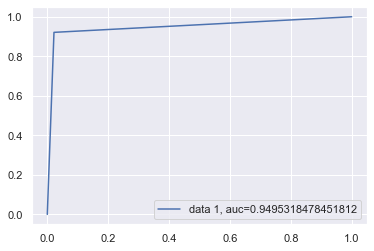

In [124]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)

plt.show()

### SMOTE Sampling

In [125]:
# Importing Library
from imblearn.over_sampling import SMOTE, ADASYN

In [126]:
print('Original dataset shape %s' % Counter(y))

rus = SMOTE(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283712, 1: 491})
Resampled dataset shape Counter({0: 283712, 1: 283712})


In [127]:
pd.Series(y_res).value_counts()

0    283712
1    283712
Name: Class, dtype: int64

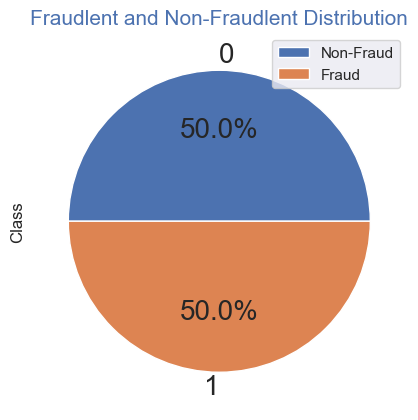

In [128]:
plt.figure(figsize=(5,5), dpi=100)
pd.Series(y_res).value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Fraudlent and Non-Fraudlent Distribution",color='b', fontsize = 15)
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

### Splitting the data

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

#### Logistic Regression

In [130]:
# Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression

# Creating method for logistic regression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)  

LogisticRegression()

#### Predicting Test data

In [131]:
y_pred=logreg.predict(X_test)
y_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

#### Confusion Matrix

In [132]:
# Importing library for confusion matrix
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

In [133]:
print('Distribution of Test Data:')
pd.Series(y_test).value_counts()

Distribution of Test Data:


1    85393
0    84835
Name: Class, dtype: int64

In [134]:
print('Confusion Matrix:')
cnf_matrix

Confusion Matrix:


array([[82838,  1997],
       [ 7170, 78223]], dtype=int64)

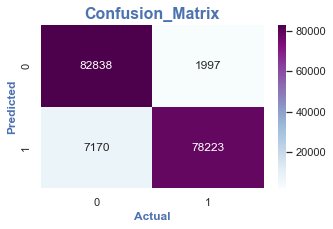

In [135]:
plt.figure(figsize=(5,3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuPu', fmt='d')
plt.title("Confusion_Matrix", fontsize=16, color='b',fontweight="bold")
plt.ylabel('Predicted', color='b',fontweight="bold")
plt.xlabel('Actual', color='b',fontweight="bold")
plt.show()

In [136]:
# Fraudlent Class prediction (Recall Score of class-1)
print(f'Recall Score of Class 1: {cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]):.4f}')

Recall Score of Class 1: 0.9160


#### Note:
Our focus is to check the accuracy percentage of fraudulent class prediction, more precisely Recall Score of Class 1

#### Accuracy Score

In [137]:
# Accuracy Score
print(f'Accuracy Score: {accuracy_score(y_pred, y_test):.4f}')

Accuracy Score: 0.9461


#### Precision Score

In [138]:
# Precision Score
print(f'Precision Score: {precision_score(y_test , y_pred):.4f}')

Precision Score: 0.9751


#### Recall Score

In [139]:
# Recall Score
print(f'Recall Score: {recall_score(y_test, y_pred):.4f}')

Recall Score: 0.9160


#### F1 Score, harmonic mean of precision (PRE) and recall (REC)

In [140]:
# F1 Score, harmonic mean of precision (PRE) and recall (REC)
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')

F1 Score: 0.9446


#### Accuracy Summary report

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     84835
           1       0.98      0.92      0.94     85393

    accuracy                           0.95    170228
   macro avg       0.95      0.95      0.95    170228
weighted avg       0.95      0.95      0.95    170228



### Observations:
- As our goal is to predict Fraudulent traction correctly. So, our focus area is to check the accuracy percentage of fraudulent class prediction
- Using SMOTE Sampling technique to handle imbalance class problem, out of 85393 fraudulent transaction, 78223 transaction has been predicted correctly
- So, the model has predicted our target outcome with 91.60% accuracy

#### Looking at predicted probability

In [142]:
y_pred_proba = logreg.predict_proba(X_test)

In [143]:
y_pred_proba[:5]

array([[9.27165091e-01, 7.28349088e-02],
       [2.22044605e-16, 1.00000000e+00],
       [9.89737651e-01, 1.02623486e-02],
       [2.41119791e-09, 9.99999998e-01],
       [9.63990727e-01, 3.60092730e-02]])

#### ROC AUC Curve

In [144]:
from sklearn.metrics import roc_auc_score
print(f'ROC_AUC Score: {roc_auc_score(y_test , y_pred):.4f}')

ROC_AUC Score: 0.9462


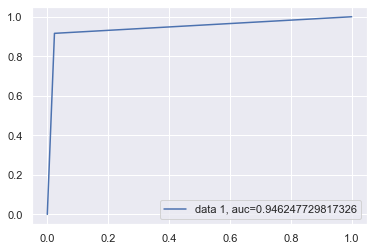

In [145]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)

plt.show()

### ADASYN

### Principle Component Analysis

In [146]:
from sklearn.decomposition import PCA # SVD , t-SNE , Linear Discrimant Analysis
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)

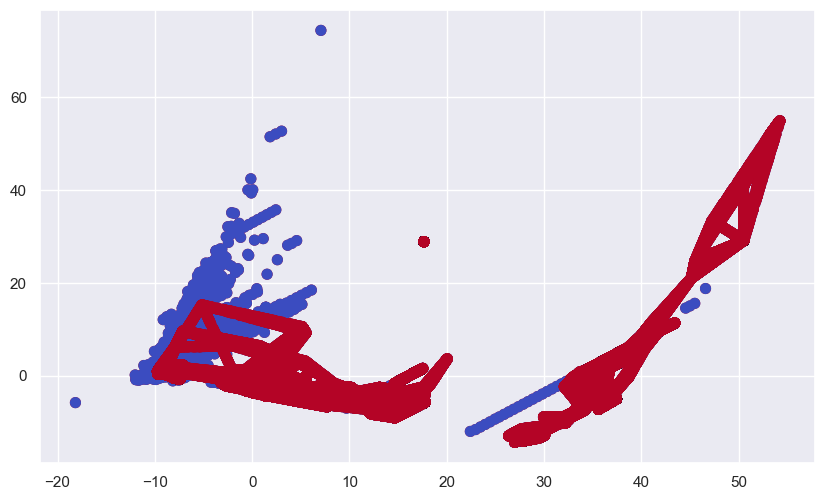

In [147]:
plt.figure(figsize=(10,6), dpi=100)

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res== 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.show()

#### Creating Multiple Datasets Using Under Sampled, Oversampled and SMOTE Technique and Trying Different Classification Model

In [148]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({0: 491, 1: 491})


#### Oversampled data

In [149]:
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 283712, 1: 283712})


#### Synthetic Minority Over Sampling Technique(SMOTE) Data

In [150]:
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 283712, 1: 283712})


Now applying different models and evaluating the dataset

In [151]:
# Importing Libraries
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Decision Tree Classifier on Raw Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9991438054913735
AUC Score: 0.8808977889507439


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85097
           1       0.79      0.76      0.77       164

    accuracy                           1.00     85261
   macro avg       0.89      0.88      0.89     85261
weighted avg       1.00      1.00      1.00     85261





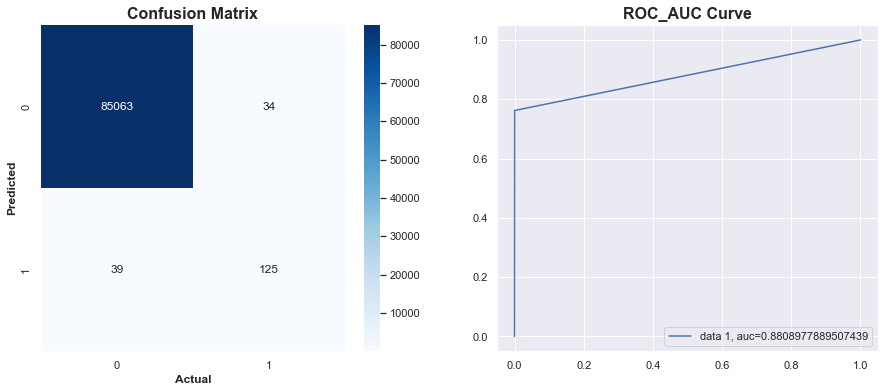

In [152]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating object and running algorithm
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

# Predicting Test Data
y_pred = dte.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')

# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### Decision Tree Classifier on Under Sampling Data



*** Looking at Performance Measures ***
Accuracy Score: 0.8983050847457628
AUC Score: 0.8982256136802427


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       149
           1       0.90      0.89      0.90       146

    accuracy                           0.90       295
   macro avg       0.90      0.90      0.90       295
weighted avg       0.90      0.90      0.90       295





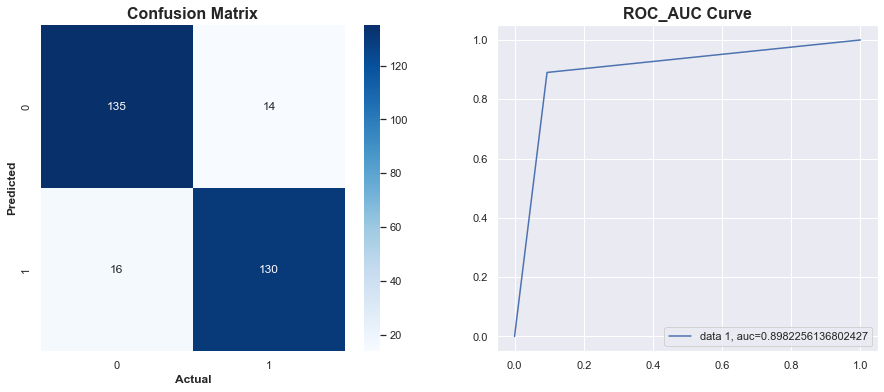

In [153]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# Creating object and running algorithm
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

# Predicting Test Data
y_pred = dte.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### Decision Tree Classifier on Over Sampling Data



*** Looking at Performance Measures ***
Accuracy Score: 0.999735648659445
AUC Score: 0.9997347792774209


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84835
           1       1.00      1.00      1.00     85393

    accuracy                           1.00    170228
   macro avg       1.00      1.00      1.00    170228
weighted avg       1.00      1.00      1.00    170228





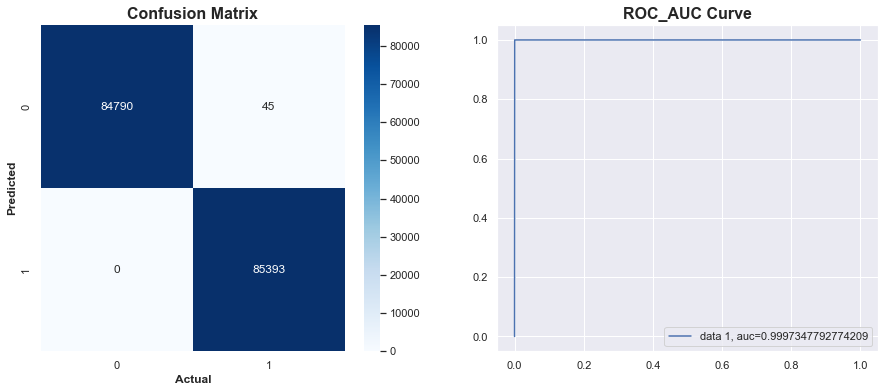

In [154]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

# Creating object and running algorithm
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

# Predicting Test Data
y_pred = dte.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### Decision Tree Classifier on SMOTE Sampling Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9981142937707075
AUC Score: 0.9981119434746624


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84835
           1       1.00      1.00      1.00     85393

    accuracy                           1.00    170228
   macro avg       1.00      1.00      1.00    170228
weighted avg       1.00      1.00      1.00    170228





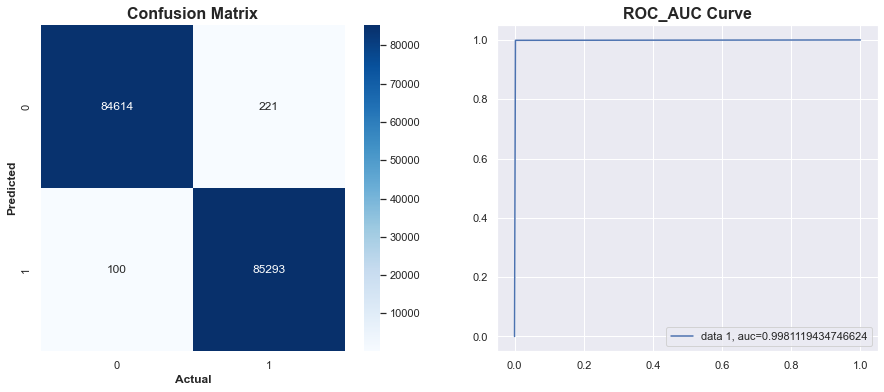

In [155]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

# Creating object and running algorithm
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

# Predicting Test Data
y_pred = dte.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()


### Observations:
Applying Decision tree classifier on all 4 types of data set (Raw, under sampled, over sampled, SMOTE) we have observed that Decision tree classifier on Over sampled data predicts the test data with better accuracy

#### Random Forest Classifier on Raw data



*** Looking at Performance Measures ***
Accuracy Score: 0.9995543097078383
AUC Score: 0.8932750559834588


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85097
           1       0.98      0.79      0.87       164

    accuracy                           1.00     85261
   macro avg       0.99      0.89      0.94     85261
weighted avg       1.00      1.00      1.00     85261





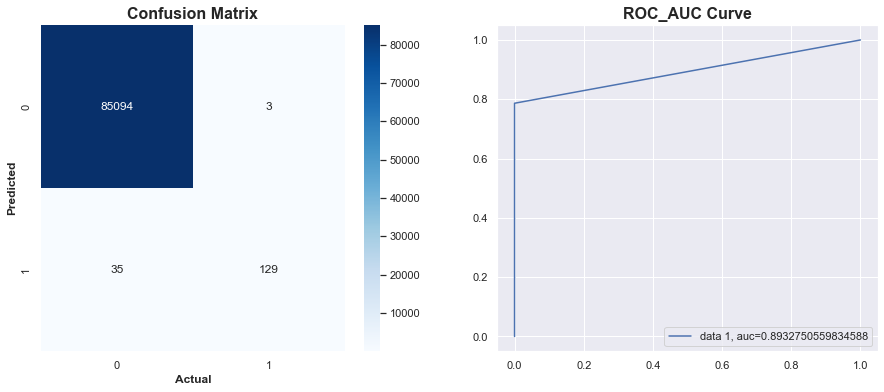

In [156]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating object and running algorithm
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )


# Predicting Test Data
y_pred = rfc.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### Random Forest Classifier on Under Sampled Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9254237288135593
AUC Score: 0.9250022984278754


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       149
           1       0.96      0.88      0.92       146

    accuracy                           0.93       295
   macro avg       0.93      0.93      0.93       295
weighted avg       0.93      0.93      0.93       295





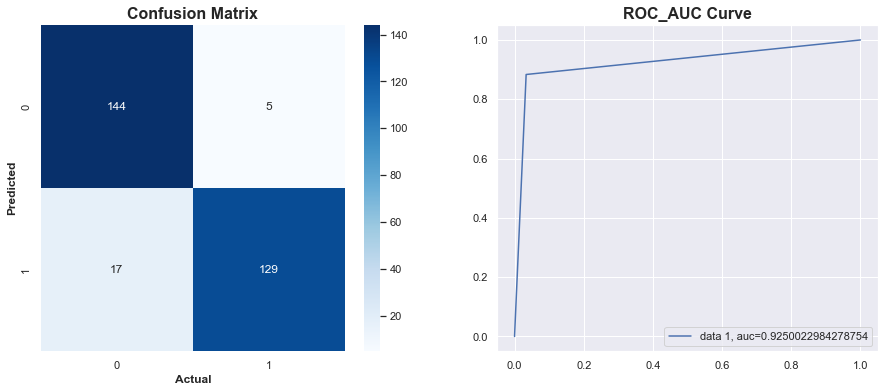

In [157]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# Creating object and running algorithm
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )


# Predicting Test Data
y_pred = rfc.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### Random Forest Classifier on Over Sampled Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9999588786803582
AUC Score: 0.9999587434431544


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84835
           1       1.00      1.00      1.00     85393

    accuracy                           1.00    170228
   macro avg       1.00      1.00      1.00    170228
weighted avg       1.00      1.00      1.00    170228





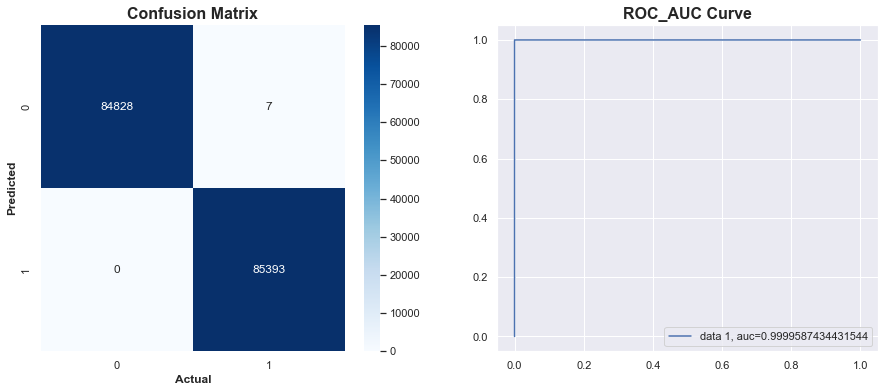

In [158]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

# Creating object and running algorithm
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )


# Predicting Test Data
y_pred = rfc.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### Random Forest Classifier on SMOTE Sampled Data



*** Looking at Performance Measures ***
Accuracy Score: 0.999894259463778
AUC Score: 0.9998939117109684


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84835
           1       1.00      1.00      1.00     85393

    accuracy                           1.00    170228
   macro avg       1.00      1.00      1.00    170228
weighted avg       1.00      1.00      1.00    170228





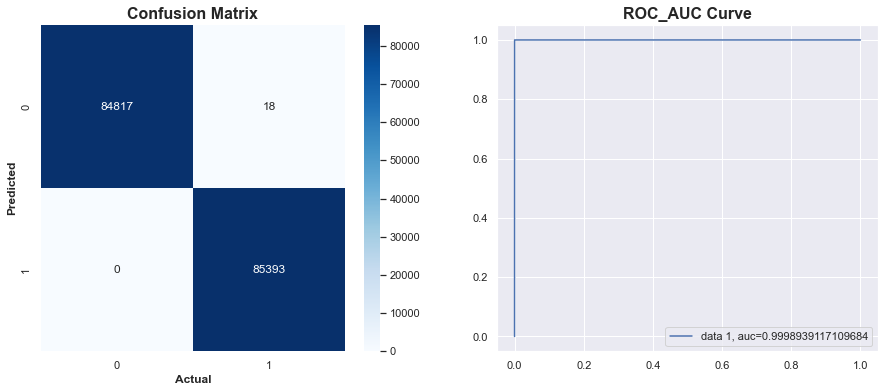

In [159]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

# Creating object and running algorithm
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )


# Predicting Test Data
y_pred = rfc.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

### Observations:
Applying Random Forest Classifier on all 4 types of data set (Raw, under sampled, over sampled, SMOTE) we have observed that Random Forest Classifier on SMOTE- sampled data predicts the test data with better accuracy

#### KNeighborsClassifier on Raw Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9995660383997372
AUC Score: 0.8963238364712638


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85097
           1       0.98      0.79      0.88       164

    accuracy                           1.00     85261
   macro avg       0.99      0.90      0.94     85261
weighted avg       1.00      1.00      1.00     85261





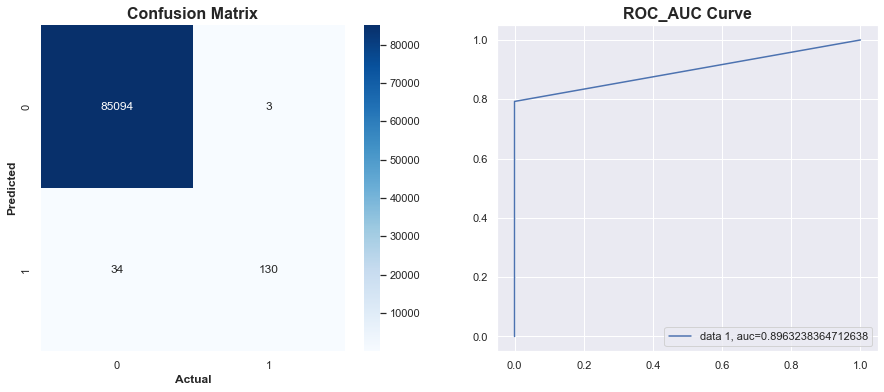

In [160]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating object and running algorithm
kn=KNeighborsClassifier()
kn.fit( X_train, y_train )


# Predicting Test Data
y_pred = kn.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### KNeighborsClassifier on under sampled Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9220338983050848
AUC Score: 0.9215776408936288


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       149
           1       0.96      0.88      0.92       146

    accuracy                           0.92       295
   macro avg       0.93      0.92      0.92       295
weighted avg       0.93      0.92      0.92       295





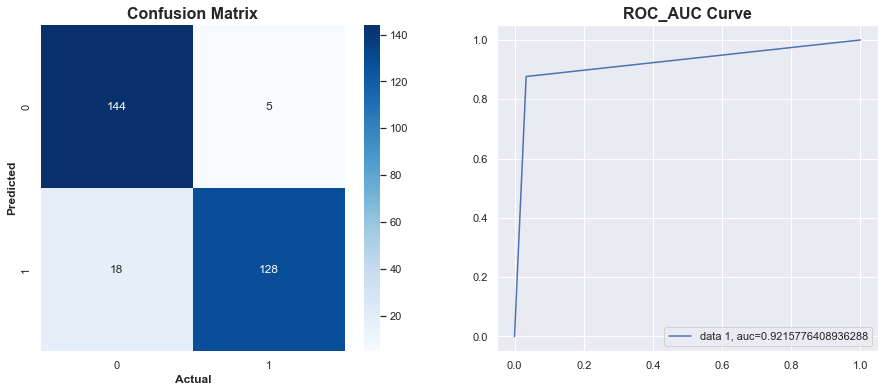

In [161]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# Creating object and running algorithm
kn=KNeighborsClassifier()
kn.fit( X_train, y_train )


# Predicting Test Data
y_pred = kn.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### KNeighborsClassifier on over sampled Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9996064102262847
AUC Score: 0.9996051158130488


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84835
           1       1.00      1.00      1.00     85393

    accuracy                           1.00    170228
   macro avg       1.00      1.00      1.00    170228
weighted avg       1.00      1.00      1.00    170228





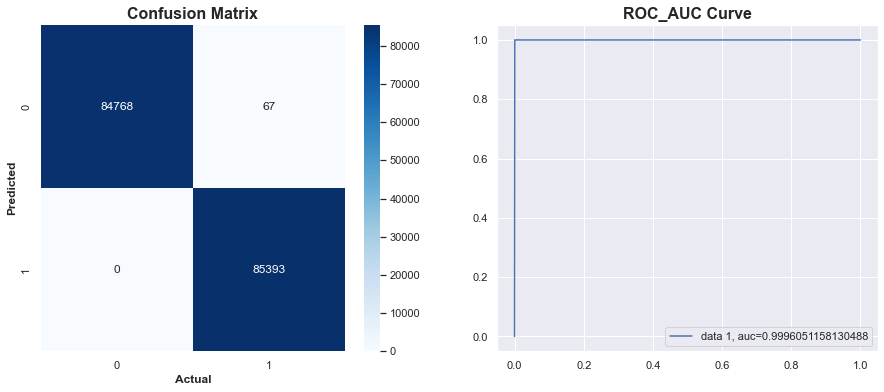

In [162]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

# Creating object and running algorithm
kn=KNeighborsClassifier()
kn.fit( X_train, y_train )


# Predicting Test Data
y_pred = kn.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

#### KNeighborsClassifier on SMOTE sampled Data



*** Looking at Performance Measures ***
Accuracy Score: 0.9990130883285946
AUC Score: 0.9990098426357046


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84835
           1       1.00      1.00      1.00     85393

    accuracy                           1.00    170228
   macro avg       1.00      1.00      1.00    170228
weighted avg       1.00      1.00      1.00    170228





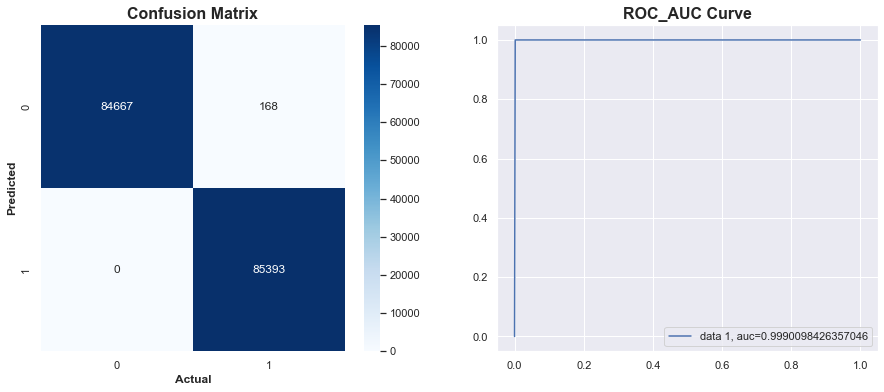

In [163]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

# Creating object and running algorithm
kn=KNeighborsClassifier()
kn.fit( X_train, y_train )


# Predicting Test Data
y_pred = kn.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()

### Observations:
Applying KNeighborsClassifier on all 4 types of data set (Raw, under sampled, over sampled, SMOTE) we have observed that KNeighborsClassifier on Over Sampled and SMOTE- sampled data predicts the test data with better accuracy

### Observations from all Trails:
So, from the above trail, we can observe that training algorithms(Logistic Regression, Decision Tree, Random Forest, KNeighborsClassifier) on oversampled data predict test data with better accuracy.

Now, We will do Hyperparameter Tuning of all the algorithm using Over Sampled data and check performance on test data

### Hyperparameter Tuning(XGBoost) with Over Sampled Data Set

In [164]:
from sklearn.model_selection import GridSearchCV

#### Hyperparameter Tuning on DecisionTree Classifier

In [165]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [166]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
# DecisionTree Classifier
tree_params = {"criterion" :['gini',"entropy"],
               "splitter" : ['best','random'],
               "max_features" : ["auto","sqrt", "log2"]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

C:\Users\sangam\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\sangam\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\sangam\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\sangam\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\U

In [167]:
tree_clf

DecisionTreeClassifier(criterion='entropy', max_features='log2')

#### Optimizing DecisionTree Classifier



*** Looking at Performance Measures ***
Accuracy Score: 0.9957410061799469
AUC Score: 0.9957464100000216


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     84835
           1       1.00      0.99      1.00     85393

    accuracy                           1.00    170228
   macro avg       1.00      1.00      1.00    170228
weighted avg       1.00      1.00      1.00    170228





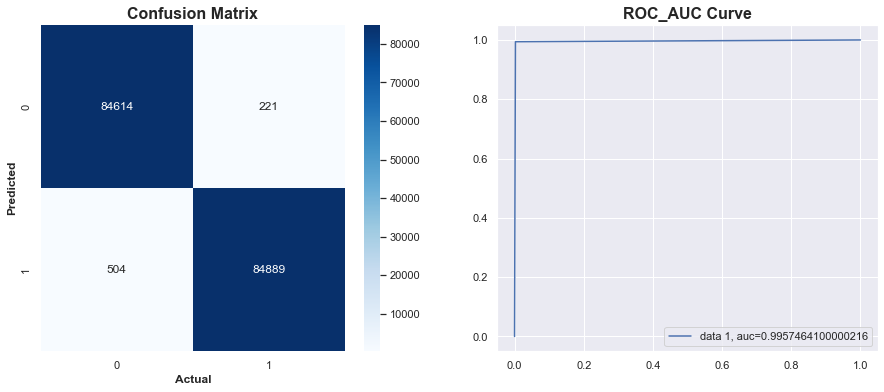

In [172]:
# Predicting Test Data
y_pred = dte.predict(X_test)

# Prediction Accuracy
print('\n')
print('*** Looking at Performance Measures ***')
print(f'Accuracy Score: {accuracy_score(y_pred , y_test)}')


# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, y_pred)

# ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc}')

print('\n')
print(classification_report(y_test, y_pred))
print('\n')
plt.figure(figsize=(15,6))

#Ploting Confusion Matrix
plt.subplot(121)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
ax.set_title("Confusion Matrix", fontsize=16, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize = 12, fontweight='bold')

# Ploting ROC AUC Curve
plt.subplot(122)
ax1 = plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC_AUC Curve',fontsize=16, fontweight='bold')
plt.show()


### Summary:
- DecisionTree Classifier predicts test data with *99.57%*
- Gives recall score of 1, means our algorithm is predicting fraudulent transaction of test data set with *99%* efficiency
- Our AUC score of *99.57%* is pretty much convincing